## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e TensorFlow

![title](imagens/mini-projeto3.png)

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

Este é um guia básico pois o TensorFlow é um framework extenso. O TensorFlow é abordado em detalhes nos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> (especialmente no curso Deep Learning Frameworks) e na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação IA Aplicada à Medicina</a>.

Na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>, no curso de Machine Learning também há um módulo sobre TensorFlow. Alguns projetos com TensorFlow podem ser encontrados no curso de IA Aplicada a Finanças da <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-blockchain">Formação Engenheiro Blockchain</a>.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Instala o TensorFlow
!pip install -q tensorflow==2.5

In [3]:
# Instala o Pydot
!pip install -q pydot

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [6]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [7]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [8]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [9]:
# Shape
dataset.shape

(506, 14)

In [10]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 80/20.

In [11]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

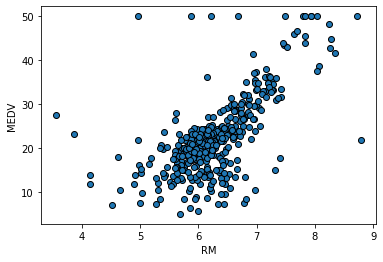

In [12]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [13]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [14]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [15]:
# Cria o modelo 
modelo = modelo_linear()

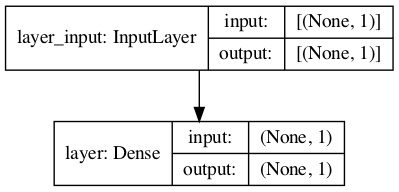

In [16]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

### Treinamento do Modelo

In [17]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [18]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [19]:
# Lista para as previsões
predictions_list = []

In [20]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [21]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [22]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [23]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 0s 143ms/step - loss: 822.2694 - mae: 27.1866 - mse: 822.2694 - val_loss: 923.1654 - val_mae: 28.4759 - val_mse: 923.1654
Epoch 2/4000
2/2 [==============================] - 0s 18ms/step - loss: 814.1203 - mae: 27.0411 - mse: 814.1203 - val_loss: 914.7408 - val_mae: 28.3301 - val_mse: 914.7408
Epoch 3/4000
2/2 [==============================] - 0s 22ms/step - loss: 806.1938 - mae: 26.8961 - mse: 806.1938 - val_loss: 906.3580 - val_mae: 28.1843 - val_mse: 906.3580
Epoch 4/4000
2/2 [==============================] - 0s 21ms/step - loss: 798.2025 - mae: 26.7510 - mse: 798.2025 - val_loss: 898.0287 - val_mae: 28.0387 - val_mse: 898.0287
Epoch 5/4000
2/2 [==============================] - 0s 22ms/step - loss: 790.2050 - mae: 26.6056 - mse: 790.2050 - val_loss: 889.7444 - val_mae: 27.8931 - val_mse: 889.7444
Epoch 6/4000
2/2 [==============================] - 0s 19ms/step - loss: 782.3250 - mae: 26.4606 - mse: 782.3250 - val_loss: 881.4975 

2/2 [==============================] - 0s 31ms/step - loss: 287.7388 - mae: 14.8183 - mse: 287.7388 - val_loss: 359.1003 - val_mae: 16.0775 - val_mse: 359.1003
Epoch 96/4000
2/2 [==============================] - 0s 25ms/step - loss: 284.2548 - mae: 14.7055 - mse: 284.2548 - val_loss: 355.2639 - val_mae: 15.9662 - val_mse: 355.2639
Epoch 97/4000
2/2 [==============================] - 0s 24ms/step - loss: 280.7335 - mae: 14.5916 - mse: 280.7335 - val_loss: 351.4724 - val_mae: 15.8553 - val_mse: 351.4724
Epoch 98/4000
2/2 [==============================] - 0s 21ms/step - loss: 277.2622 - mae: 14.4787 - mse: 277.2622 - val_loss: 347.7258 - val_mae: 15.7450 - val_mse: 347.7258
Epoch 99/4000
2/2 [==============================] - 0s 23ms/step - loss: 273.7669 - mae: 14.3670 - mse: 273.7669 - val_loss: 344.0216 - val_mae: 15.6351 - val_mse: 344.0216
Epoch 100/4000
2/2 [==============================] - 0s 23ms/step - loss: 270.3857 - mae: 14.2556 - mse: 270.3857 - val_loss: 340.3423 - val_ma

Epoch 142/4000
2/2 [==============================] - 0s 19ms/step - loss: 157.6528 - mae: 10.1235 - mse: 157.6528 - val_loss: 217.0696 - val_mae: 11.5315 - val_mse: 217.0696
Epoch 143/4000
2/2 [==============================] - 0s 18ms/step - loss: 155.6624 - mae: 10.0388 - mse: 155.6624 - val_loss: 214.8165 - val_mae: 11.4555 - val_mse: 214.8165
Epoch 144/4000
2/2 [==============================] - 0s 20ms/step - loss: 153.7004 - mae: 9.9546 - mse: 153.7004 - val_loss: 212.6044 - val_mae: 11.3802 - val_mse: 212.6044
Epoch 145/4000
2/2 [==============================] - 0s 20ms/step - loss: 151.6909 - mae: 9.8710 - mse: 151.6909 - val_loss: 210.4360 - val_mae: 11.3057 - val_mse: 210.4360
Epoch 146/4000
2/2 [==============================] - 0s 22ms/step - loss: 149.7957 - mae: 9.7904 - mse: 149.7957 - val_loss: 208.2914 - val_mae: 11.2313 - val_mse: 208.2914
Epoch 147/4000
2/2 [==============================] - 0s 22ms/step - loss: 147.8877 - mae: 9.7094 - mse: 147.8877 - val_loss: 20

Epoch 237/4000
2/2 [==============================] - 0s 17ms/step - loss: 62.1312 - mae: 5.5553 - mse: 62.1312 - val_loss: 104.2656 - val_mae: 7.1628 - val_mse: 104.2656
Epoch 238/4000
2/2 [==============================] - 0s 24ms/step - loss: 61.8757 - mae: 5.5404 - mse: 61.8757 - val_loss: 103.8738 - val_mae: 7.1466 - val_mse: 103.8738
Epoch 239/4000
2/2 [==============================] - 0s 17ms/step - loss: 61.6155 - mae: 5.5258 - mse: 61.6155 - val_loss: 103.4957 - val_mae: 7.1308 - val_mse: 103.4957
Epoch 240/4000
2/2 [==============================] - 0s 17ms/step - loss: 61.3664 - mae: 5.5119 - mse: 61.3664 - val_loss: 103.1300 - val_mae: 7.1153 - val_mse: 103.1300
Epoch 241/4000
2/2 [==============================] - 0s 17ms/step - loss: 61.1275 - mae: 5.4989 - mse: 61.1275 - val_loss: 102.7757 - val_mae: 7.1000 - val_mse: 102.7757
Epoch 242/4000
2/2 [==============================] - 0s 17ms/step - loss: 60.9030 - mae: 5.4872 - mse: 60.9030 - val_loss: 102.4325 - val_mae: 7

2/2 [==============================] - 0s 16ms/step - loss: 55.8304 - mae: 5.3423 - mse: 55.8304 - val_loss: 92.5025 - val_mae: 6.8341 - val_mse: 92.5025
Epoch 334/4000
2/2 [==============================] - 0s 17ms/step - loss: 55.8292 - mae: 5.3428 - mse: 55.8292 - val_loss: 92.4927 - val_mae: 6.8340 - val_mse: 92.4927
Epoch 335/4000
2/2 [==============================] - 0s 18ms/step - loss: 55.8256 - mae: 5.3430 - mse: 55.8256 - val_loss: 92.4881 - val_mae: 6.8338 - val_mse: 92.4881
Epoch 336/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.8229 - mae: 5.3430 - mse: 55.8229 - val_loss: 92.4857 - val_mae: 6.8337 - val_mse: 92.4857
Epoch 337/4000
2/2 [==============================] - 0s 17ms/step - loss: 55.8213 - mae: 5.3429 - mse: 55.8213 - val_loss: 92.4810 - val_mae: 6.8336 - val_mse: 92.4810
Epoch 338/4000
2/2 [==============================] - 0s 17ms/step - loss: 55.8176 - mae: 5.3430 - mse: 55.8176 - val_loss: 92.4675 - val_mae: 6.8334 - val_mse: 92.4675
E

2/2 [==============================] - 0s 16ms/step - loss: 55.4957 - mae: 5.3275 - mse: 55.4957 - val_loss: 92.2011 - val_mae: 6.8156 - val_mse: 92.2011
Epoch 430/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.4900 - mae: 5.3275 - mse: 55.4900 - val_loss: 92.1852 - val_mae: 6.8152 - val_mse: 92.1852
Epoch 431/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.4843 - mae: 5.3280 - mse: 55.4843 - val_loss: 92.1668 - val_mae: 6.8149 - val_mse: 92.1668
Epoch 432/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.4800 - mae: 5.3287 - mse: 55.4800 - val_loss: 92.1480 - val_mae: 6.8145 - val_mse: 92.1480
Epoch 433/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.4734 - mae: 5.3291 - mse: 55.4734 - val_loss: 92.1356 - val_mae: 6.8141 - val_mse: 92.1356
Epoch 434/4000
2/2 [==============================] - 0s 17ms/step - loss: 55.4676 - mae: 5.3293 - mse: 55.4676 - val_loss: 92.1228 - val_mae: 6.8138 - val_mse: 92.1228
E

2/2 [==============================] - 0s 16ms/step - loss: 54.8429 - mae: 5.3074 - mse: 54.8429 - val_loss: 91.4295 - val_mae: 6.7772 - val_mse: 91.4295
Epoch 526/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.8340 - mae: 5.3104 - mse: 54.8340 - val_loss: 91.3843 - val_mae: 6.7765 - val_mse: 91.3843
Epoch 527/4000
2/2 [==============================] - 0s 17ms/step - loss: 54.8301 - mae: 5.3128 - mse: 54.8301 - val_loss: 91.3432 - val_mae: 6.7757 - val_mse: 91.3432
Epoch 528/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.8290 - mae: 5.3154 - mse: 54.8290 - val_loss: 91.3145 - val_mae: 6.7751 - val_mse: 91.3145
Epoch 529/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.8200 - mae: 5.3163 - mse: 54.8200 - val_loss: 91.3086 - val_mae: 6.7747 - val_mse: 91.3086
Epoch 530/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.8124 - mae: 5.3159 - mse: 54.8124 - val_loss: 91.3049 - val_mae: 6.7742 - val_mse: 91.3049
E

2/2 [==============================] - 0s 16ms/step - loss: 54.0164 - mae: 5.2469 - mse: 54.0164 - val_loss: 91.1135 - val_mae: 6.7322 - val_mse: 91.1135
Epoch 622/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.0081 - mae: 5.2452 - mse: 54.0081 - val_loss: 91.1334 - val_mae: 6.7318 - val_mse: 91.1334
Epoch 623/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.0088 - mae: 5.2433 - mse: 54.0088 - val_loss: 91.1531 - val_mae: 6.7315 - val_mse: 91.1531
Epoch 624/4000
2/2 [==============================] - 0s 17ms/step - loss: 53.9948 - mae: 5.2418 - mse: 53.9948 - val_loss: 91.1326 - val_mae: 6.7309 - val_mse: 91.1326
Epoch 625/4000
2/2 [==============================] - 0s 17ms/step - loss: 53.9843 - mae: 5.2415 - mse: 53.9843 - val_loss: 91.1232 - val_mae: 6.7303 - val_mse: 91.1232
Epoch 626/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.9731 - mae: 5.2414 - mse: 53.9731 - val_loss: 91.0861 - val_mae: 6.7296 - val_mse: 91.0861
E

2/2 [==============================] - 0s 16ms/step - loss: 53.1240 - mae: 5.1887 - mse: 53.1240 - val_loss: 90.5536 - val_mae: 6.6799 - val_mse: 90.5536
Epoch 718/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.1100 - mae: 5.1892 - mse: 53.1100 - val_loss: 90.4966 - val_mae: 6.6790 - val_mse: 90.4966
Epoch 719/4000
2/2 [==============================] - 0s 18ms/step - loss: 53.1089 - mae: 5.1921 - mse: 53.1089 - val_loss: 90.4356 - val_mae: 6.6781 - val_mse: 90.4356
Epoch 720/4000
2/2 [==============================] - 0s 17ms/step - loss: 53.0925 - mae: 5.1937 - mse: 53.0925 - val_loss: 90.3997 - val_mae: 6.6773 - val_mse: 90.3997
Epoch 721/4000
2/2 [==============================] - 0s 17ms/step - loss: 53.0830 - mae: 5.1957 - mse: 53.0830 - val_loss: 90.3314 - val_mae: 6.6763 - val_mse: 90.3314
Epoch 722/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.0726 - mae: 5.1990 - mse: 53.0726 - val_loss: 90.2844 - val_mae: 6.6755 - val_mse: 90.2844
E

2/2 [==============================] - 0s 16ms/step - loss: 52.2508 - mae: 5.1423 - mse: 52.2508 - val_loss: 89.9448 - val_mae: 6.6272 - val_mse: 89.9448
Epoch 814/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.2522 - mae: 5.1373 - mse: 52.2522 - val_loss: 90.0318 - val_mae: 6.6273 - val_mse: 90.0318
Epoch 815/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.2470 - mae: 5.1329 - mse: 52.2470 - val_loss: 90.0803 - val_mae: 6.6271 - val_mse: 90.0803
Epoch 816/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.2404 - mae: 5.1304 - mse: 52.2404 - val_loss: 90.1023 - val_mae: 6.6267 - val_mse: 90.1023
Epoch 817/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.2372 - mae: 5.1286 - mse: 52.2372 - val_loss: 90.1228 - val_mae: 6.6263 - val_mse: 90.1228
Epoch 818/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.2285 - mae: 5.1272 - mse: 52.2285 - val_loss: 90.1064 - val_mae: 6.6257 - val_mse: 90.1064
E

2/2 [==============================] - 0s 16ms/step - loss: 51.4835 - mae: 5.0929 - mse: 51.4835 - val_loss: 89.3925 - val_mae: 6.5778 - val_mse: 89.3925
Epoch 910/4000
2/2 [==============================] - 0s 16ms/step - loss: 51.4662 - mae: 5.0925 - mse: 51.4662 - val_loss: 89.3431 - val_mae: 6.5770 - val_mse: 89.3431
Epoch 911/4000
2/2 [==============================] - 0s 17ms/step - loss: 51.4558 - mae: 5.0942 - mse: 51.4558 - val_loss: 89.2946 - val_mae: 6.5762 - val_mse: 89.2946
Epoch 912/4000
2/2 [==============================] - 0s 16ms/step - loss: 51.4473 - mae: 5.0961 - mse: 51.4473 - val_loss: 89.2296 - val_mae: 6.5753 - val_mse: 89.2296
Epoch 913/4000
2/2 [==============================] - 0s 16ms/step - loss: 51.4408 - mae: 5.0992 - mse: 51.4408 - val_loss: 89.1652 - val_mae: 6.5744 - val_mse: 89.1652
Epoch 914/4000
2/2 [==============================] - 0s 16ms/step - loss: 51.4498 - mae: 5.1034 - mse: 51.4498 - val_loss: 89.1177 - val_mae: 6.5736 - val_mse: 89.1177
E

2/2 [==============================] - 0s 16ms/step - loss: 50.7337 - mae: 5.0632 - mse: 50.7337 - val_loss: 88.6572 - val_mae: 6.5275 - val_mse: 88.6572
Epoch 1006/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.7271 - mae: 5.0583 - mse: 50.7271 - val_loss: 88.7390 - val_mae: 6.5277 - val_mse: 88.7390
Epoch 1007/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.7188 - mae: 5.0529 - mse: 50.7188 - val_loss: 88.8023 - val_mae: 6.5276 - val_mse: 88.8023
Epoch 1008/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.7053 - mae: 5.0485 - mse: 50.7053 - val_loss: 88.8458 - val_mae: 6.5275 - val_mse: 88.8458
Epoch 1009/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.7056 - mae: 5.0461 - mse: 50.7056 - val_loss: 88.8901 - val_mae: 6.5273 - val_mse: 88.8901
Epoch 1010/4000
2/2 [==============================] - 0s 17ms/step - loss: 50.6963 - mae: 5.0433 - mse: 50.6963 - val_loss: 88.9099 - val_mae: 6.5269 - val_mse: 88.9

2/2 [==============================] - 0s 18ms/step - loss: 50.0482 - mae: 4.9985 - mse: 50.0482 - val_loss: 88.5711 - val_mae: 6.4830 - val_mse: 88.5711
Epoch 1102/4000
2/2 [==============================] - 0s 18ms/step - loss: 50.0385 - mae: 4.9962 - mse: 50.0385 - val_loss: 88.5682 - val_mae: 6.4825 - val_mse: 88.5682
Epoch 1103/4000
2/2 [==============================] - 0s 19ms/step - loss: 50.0300 - mae: 4.9958 - mse: 50.0300 - val_loss: 88.5353 - val_mae: 6.4818 - val_mse: 88.5353
Epoch 1104/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.0213 - mae: 4.9966 - mse: 50.0213 - val_loss: 88.4792 - val_mae: 6.4810 - val_mse: 88.4792
Epoch 1105/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.0143 - mae: 4.9985 - mse: 50.0143 - val_loss: 88.4266 - val_mae: 6.4802 - val_mse: 88.4266
Epoch 1106/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.0046 - mae: 5.0003 - mse: 50.0046 - val_loss: 88.3949 - val_mae: 6.4795 - val_mse: 88.3

2/2 [==============================] - 0s 17ms/step - loss: 49.3770 - mae: 4.9793 - mse: 49.3770 - val_loss: 87.6865 - val_mae: 6.4364 - val_mse: 87.6865
Epoch 1198/4000
2/2 [==============================] - 0s 17ms/step - loss: 49.3694 - mae: 4.9757 - mse: 49.3694 - val_loss: 87.7369 - val_mae: 6.4351 - val_mse: 87.7369
Epoch 1199/4000
2/2 [==============================] - 0s 16ms/step - loss: 49.3590 - mae: 4.9721 - mse: 49.3590 - val_loss: 87.7721 - val_mae: 6.4340 - val_mse: 87.7721
Epoch 1200/4000
2/2 [==============================] - 0s 16ms/step - loss: 49.3533 - mae: 4.9694 - mse: 49.3533 - val_loss: 87.7874 - val_mae: 6.4333 - val_mse: 87.7874
Epoch 1201/4000
2/2 [==============================] - 0s 15ms/step - loss: 49.3435 - mae: 4.9689 - mse: 49.3435 - val_loss: 87.7822 - val_mae: 6.4328 - val_mse: 87.7822
Epoch 1202/4000
2/2 [==============================] - 0s 16ms/step - loss: 49.3338 - mae: 4.9676 - mse: 49.3338 - val_loss: 87.8065 - val_mae: 6.4319 - val_mse: 87.8

2/2 [==============================] - 0s 16ms/step - loss: 48.7379 - mae: 4.9278 - mse: 48.7379 - val_loss: 87.4668 - val_mae: 6.3972 - val_mse: 87.4668
Epoch 1294/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.7357 - mae: 4.9238 - mse: 48.7357 - val_loss: 87.5306 - val_mae: 6.3985 - val_mse: 87.5306
Epoch 1295/4000
2/2 [==============================] - 0s 16ms/step - loss: 48.7441 - mae: 4.9209 - mse: 48.7441 - val_loss: 87.5640 - val_mae: 6.3997 - val_mse: 87.5640
Epoch 1296/4000
2/2 [==============================] - 0s 16ms/step - loss: 48.7213 - mae: 4.9192 - mse: 48.7213 - val_loss: 87.5366 - val_mae: 6.3983 - val_mse: 87.5366
Epoch 1297/4000
2/2 [==============================] - 0s 16ms/step - loss: 48.7177 - mae: 4.9202 - mse: 48.7177 - val_loss: 87.4960 - val_mae: 6.3970 - val_mse: 87.4960
Epoch 1298/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.7083 - mae: 4.9211 - mse: 48.7083 - val_loss: 87.4711 - val_mae: 6.3962 - val_mse: 87.4

2/2 [==============================] - 0s 17ms/step - loss: 48.1592 - mae: 4.8900 - mse: 48.1592 - val_loss: 87.0005 - val_mae: 6.3643 - val_mse: 87.0005
Epoch 1390/4000
2/2 [==============================] - 0s 18ms/step - loss: 48.1542 - mae: 4.8908 - mse: 48.1542 - val_loss: 86.9751 - val_mae: 6.3635 - val_mse: 86.9751
Epoch 1391/4000
2/2 [==============================] - 0s 19ms/step - loss: 48.1499 - mae: 4.8913 - mse: 48.1499 - val_loss: 86.9620 - val_mae: 6.3629 - val_mse: 86.9620
Epoch 1392/4000
2/2 [==============================] - 0s 18ms/step - loss: 48.1442 - mae: 4.8914 - mse: 48.1442 - val_loss: 86.9574 - val_mae: 6.3626 - val_mse: 86.9574
Epoch 1393/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.1398 - mae: 4.8912 - mse: 48.1398 - val_loss: 86.9666 - val_mae: 6.3626 - val_mse: 86.9666
Epoch 1394/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.1322 - mae: 4.8898 - mse: 48.1322 - val_loss: 87.0047 - val_mae: 6.3632 - val_mse: 87.0

2/2 [==============================] - 0s 20ms/step - loss: 47.6345 - mae: 4.8441 - mse: 47.6345 - val_loss: 86.8717 - val_mae: 6.3401 - val_mse: 86.8717
Epoch 1486/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.6237 - mae: 4.8450 - mse: 47.6237 - val_loss: 86.8217 - val_mae: 6.3388 - val_mse: 86.8217
Epoch 1487/4000
2/2 [==============================] - 0s 22ms/step - loss: 47.6316 - mae: 4.8477 - mse: 47.6316 - val_loss: 86.7703 - val_mae: 6.3374 - val_mse: 86.7703
Epoch 1488/4000
2/2 [==============================] - 0s 20ms/step - loss: 47.6153 - mae: 4.8484 - mse: 47.6153 - val_loss: 86.7623 - val_mae: 6.3370 - val_mse: 86.7623
Epoch 1489/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.6097 - mae: 4.8481 - mse: 47.6097 - val_loss: 86.7627 - val_mae: 6.3368 - val_mse: 86.7627
Epoch 1490/4000
2/2 [==============================] - 0s 20ms/step - loss: 47.6042 - mae: 4.8476 - mse: 47.6042 - val_loss: 86.7589 - val_mae: 6.3365 - val_mse: 86.7

2/2 [==============================] - 0s 20ms/step - loss: 47.1217 - mae: 4.8069 - mse: 47.1217 - val_loss: 86.6316 - val_mae: 6.3126 - val_mse: 86.6316
Epoch 1582/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.1161 - mae: 4.8066 - mse: 47.1161 - val_loss: 86.6127 - val_mae: 6.3120 - val_mse: 86.6127
Epoch 1583/4000
2/2 [==============================] - 0s 19ms/step - loss: 47.1106 - mae: 4.8069 - mse: 47.1106 - val_loss: 86.5880 - val_mae: 6.3112 - val_mse: 86.5880
Epoch 1584/4000
2/2 [==============================] - 0s 20ms/step - loss: 47.1064 - mae: 4.8076 - mse: 47.1064 - val_loss: 86.5725 - val_mae: 6.3106 - val_mse: 86.5725
Epoch 1585/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.1001 - mae: 4.8075 - mse: 47.1001 - val_loss: 86.5831 - val_mae: 6.3106 - val_mse: 86.5831
Epoch 1586/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.0970 - mae: 4.8061 - mse: 47.0970 - val_loss: 86.6110 - val_mae: 6.3110 - val_mse: 86.6

2/2 [==============================] - 0s 21ms/step - loss: 46.5923 - mae: 4.7716 - mse: 46.5923 - val_loss: 86.2685 - val_mae: 6.2803 - val_mse: 86.2685
Epoch 1678/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.5813 - mae: 4.7733 - mse: 46.5813 - val_loss: 86.1741 - val_mae: 6.2779 - val_mse: 86.1741
Epoch 1679/4000
2/2 [==============================] - 0s 21ms/step - loss: 46.6046 - mae: 4.7788 - mse: 46.6046 - val_loss: 86.1025 - val_mae: 6.2761 - val_mse: 86.1025
Epoch 1680/4000
2/2 [==============================] - 0s 20ms/step - loss: 46.5734 - mae: 4.7790 - mse: 46.5734 - val_loss: 86.0980 - val_mae: 6.2757 - val_mse: 86.0980
Epoch 1681/4000
2/2 [==============================] - 0s 20ms/step - loss: 46.5693 - mae: 4.7787 - mse: 46.5693 - val_loss: 86.0902 - val_mae: 6.2753 - val_mse: 86.0902
Epoch 1682/4000
2/2 [==============================] - 0s 20ms/step - loss: 46.5638 - mae: 4.7787 - mse: 46.5638 - val_loss: 86.0686 - val_mae: 6.2746 - val_mse: 86.0

2/2 [==============================] - 0s 19ms/step - loss: 46.1359 - mae: 4.7449 - mse: 46.1359 - val_loss: 85.9201 - val_mae: 6.2505 - val_mse: 85.9201
Epoch 1774/4000
2/2 [==============================] - 0s 20ms/step - loss: 46.1343 - mae: 4.7460 - mse: 46.1343 - val_loss: 85.8750 - val_mae: 6.2492 - val_mse: 85.8750
Epoch 1775/4000
2/2 [==============================] - 0s 20ms/step - loss: 46.1285 - mae: 4.7475 - mse: 46.1285 - val_loss: 85.8572 - val_mae: 6.2486 - val_mse: 85.8572
Epoch 1776/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.1248 - mae: 4.7476 - mse: 46.1248 - val_loss: 85.8650 - val_mae: 6.2486 - val_mse: 85.8650
Epoch 1777/4000
2/2 [==============================] - 0s 21ms/step - loss: 46.1200 - mae: 4.7464 - mse: 46.1200 - val_loss: 85.8974 - val_mae: 6.2491 - val_mse: 85.8974
Epoch 1778/4000
2/2 [==============================] - 0s 20ms/step - loss: 46.1154 - mae: 4.7450 - mse: 46.1154 - val_loss: 85.9196 - val_mae: 6.2494 - val_mse: 85.9

2/2 [==============================] - 0s 21ms/step - loss: 45.7189 - mae: 4.7236 - mse: 45.7189 - val_loss: 85.4978 - val_mae: 6.2191 - val_mse: 85.4978
Epoch 1870/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.7160 - mae: 4.7241 - mse: 45.7160 - val_loss: 85.4817 - val_mae: 6.2185 - val_mse: 85.4817
Epoch 1871/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.7110 - mae: 4.7244 - mse: 45.7110 - val_loss: 85.4529 - val_mae: 6.2175 - val_mse: 85.4529
Epoch 1872/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.7105 - mae: 4.7253 - mse: 45.7105 - val_loss: 85.4221 - val_mae: 6.2165 - val_mse: 85.4221
Epoch 1873/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.7069 - mae: 4.7263 - mse: 45.7069 - val_loss: 85.4120 - val_mae: 6.2160 - val_mse: 85.4120
Epoch 1874/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.7129 - mae: 4.7269 - mse: 45.7129 - val_loss: 85.4120 - val_mae: 6.2158 - val_mse: 85.4

In [24]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [25]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [26]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [27]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [28]:
df.head()

,MSE em Treino,MSE em Validação
0,822.269409,923.165405
1,814.120300,914.740845
2,806.193787,906.358032
3,798.202454,898.028748
4,790.205017,889.744446


<AxesSubplot:>

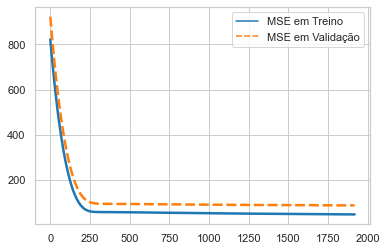

In [29]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [30]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [31]:
# Imprime as previsões
previsoes

array([21.058113, 18.82715 , 23.762814, 21.432693, 20.76065 , 20.84879 ,
       24.313667, 21.967026, 21.201336, 21.025063, 25.53106 , 23.333145,
       21.394135, 22.699661, 23.178905, 21.702614, 26.58319 , 23.267044,
       28.83619 , 20.215305, 20.639465, 21.15176 , 19.55428 , 21.058113,
       19.344954, 23.410267, 22.831867, 15.119894, 17.752981, 34.118893,
       21.592442, 18.67842 , 20.259377, 22.771275, 30.758675, 24.137394,
       21.878887, 27.525154, 25.44292 , 31.364616, 27.134045, 29.90485 ,
       31.243427, 17.752981, 23.00814 , 23.200943, 18.794098, 23.448826,
       35.93121 , 34.245586, 18.612316, 33.689224, 30.35104 , 25.586143,
       23.531456, 22.771275, 25.778942, 27.359898, 24.50647 , 24.159428,
       23.107296, 19.427584, 23.322128, 22.776783, 21.239899, 20.45768 ,
       21.361084, 22.203892, 21.735664, 21.653038, 26.632767, 24.61113 ,
       12.046122, 14.866501, 17.675861, 23.267044, 18.022902, 18.45257 ,
       23.300095, 21.603462, 20.463188, 25.624706, 

# Fim